**1) Part 1의 code를 수정해서 (Strong likelihood, Weak likelihood) x (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**

In [1]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

In [3]:
def BetaBinomPlotting(n, num_success, alpha, beta, x, y, title, hyp=0):
    """
    [Likelihood]
    n : number of trials
    num_success : number of success (y)
    hyp : to extensify scale of likelihood (default=0)
    
    [Prior]
    alpha : alpha
    beta : beta
    
    [Axs]
    x, y : plot location
    """
    prior = st.beta(alpha, beta)
    post = st.beta(alpha+n, beta+n-num_success)
    thetas = np.linspace(0, 1, 300)
    
    plt.style.use('ggplot')
    axs[x, y].plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    axs[x, y].plot(thetas, (10**hyp)*likelihood(thetas, n, num_success), label='Likelihood', c='orange')
    axs[x, y].plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    
    axs[x, y].set_title(title)
    axs[x, y].set_xlabel(r'$\theta$')
    axs[x, y].set_ylabel('Density')
    axs[x, y].legend();

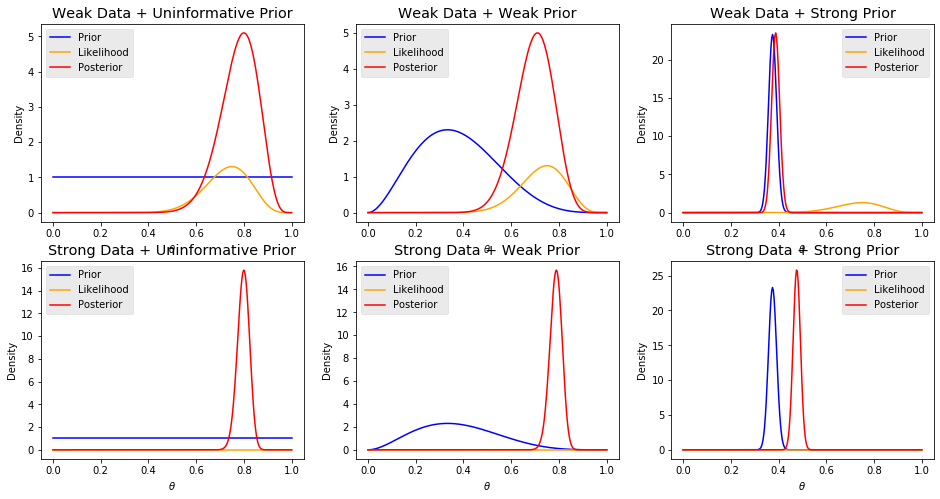

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

hyp=5
BetaBinomPlotting(20, 15, 1, 1, 0, 0, "Weak Data + Uninformative Prior", hyp)
BetaBinomPlotting(20, 15, 3, 5, 0, 1, "Weak Data + Weak Prior", hyp)
BetaBinomPlotting(20, 15, 300, 500, 0, 2, "Weak Data + Strong Prior", hyp)
BetaBinomPlotting(200, 150, 1, 1, 1, 0, "Strong Data + Uninformative Prior", hyp)
BetaBinomPlotting(200, 150, 3, 5, 1, 1, "Strong Data + Weak Prior", hyp)
BetaBinomPlotting(200, 150, 300, 500, 1, 2, "Strong Data + Strong Prior", hyp)

# fig.tight_layout()

**2) BDA 1.3 Exercise**  
  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$.  
  
Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$.  
  
Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$.  
  
Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes.  

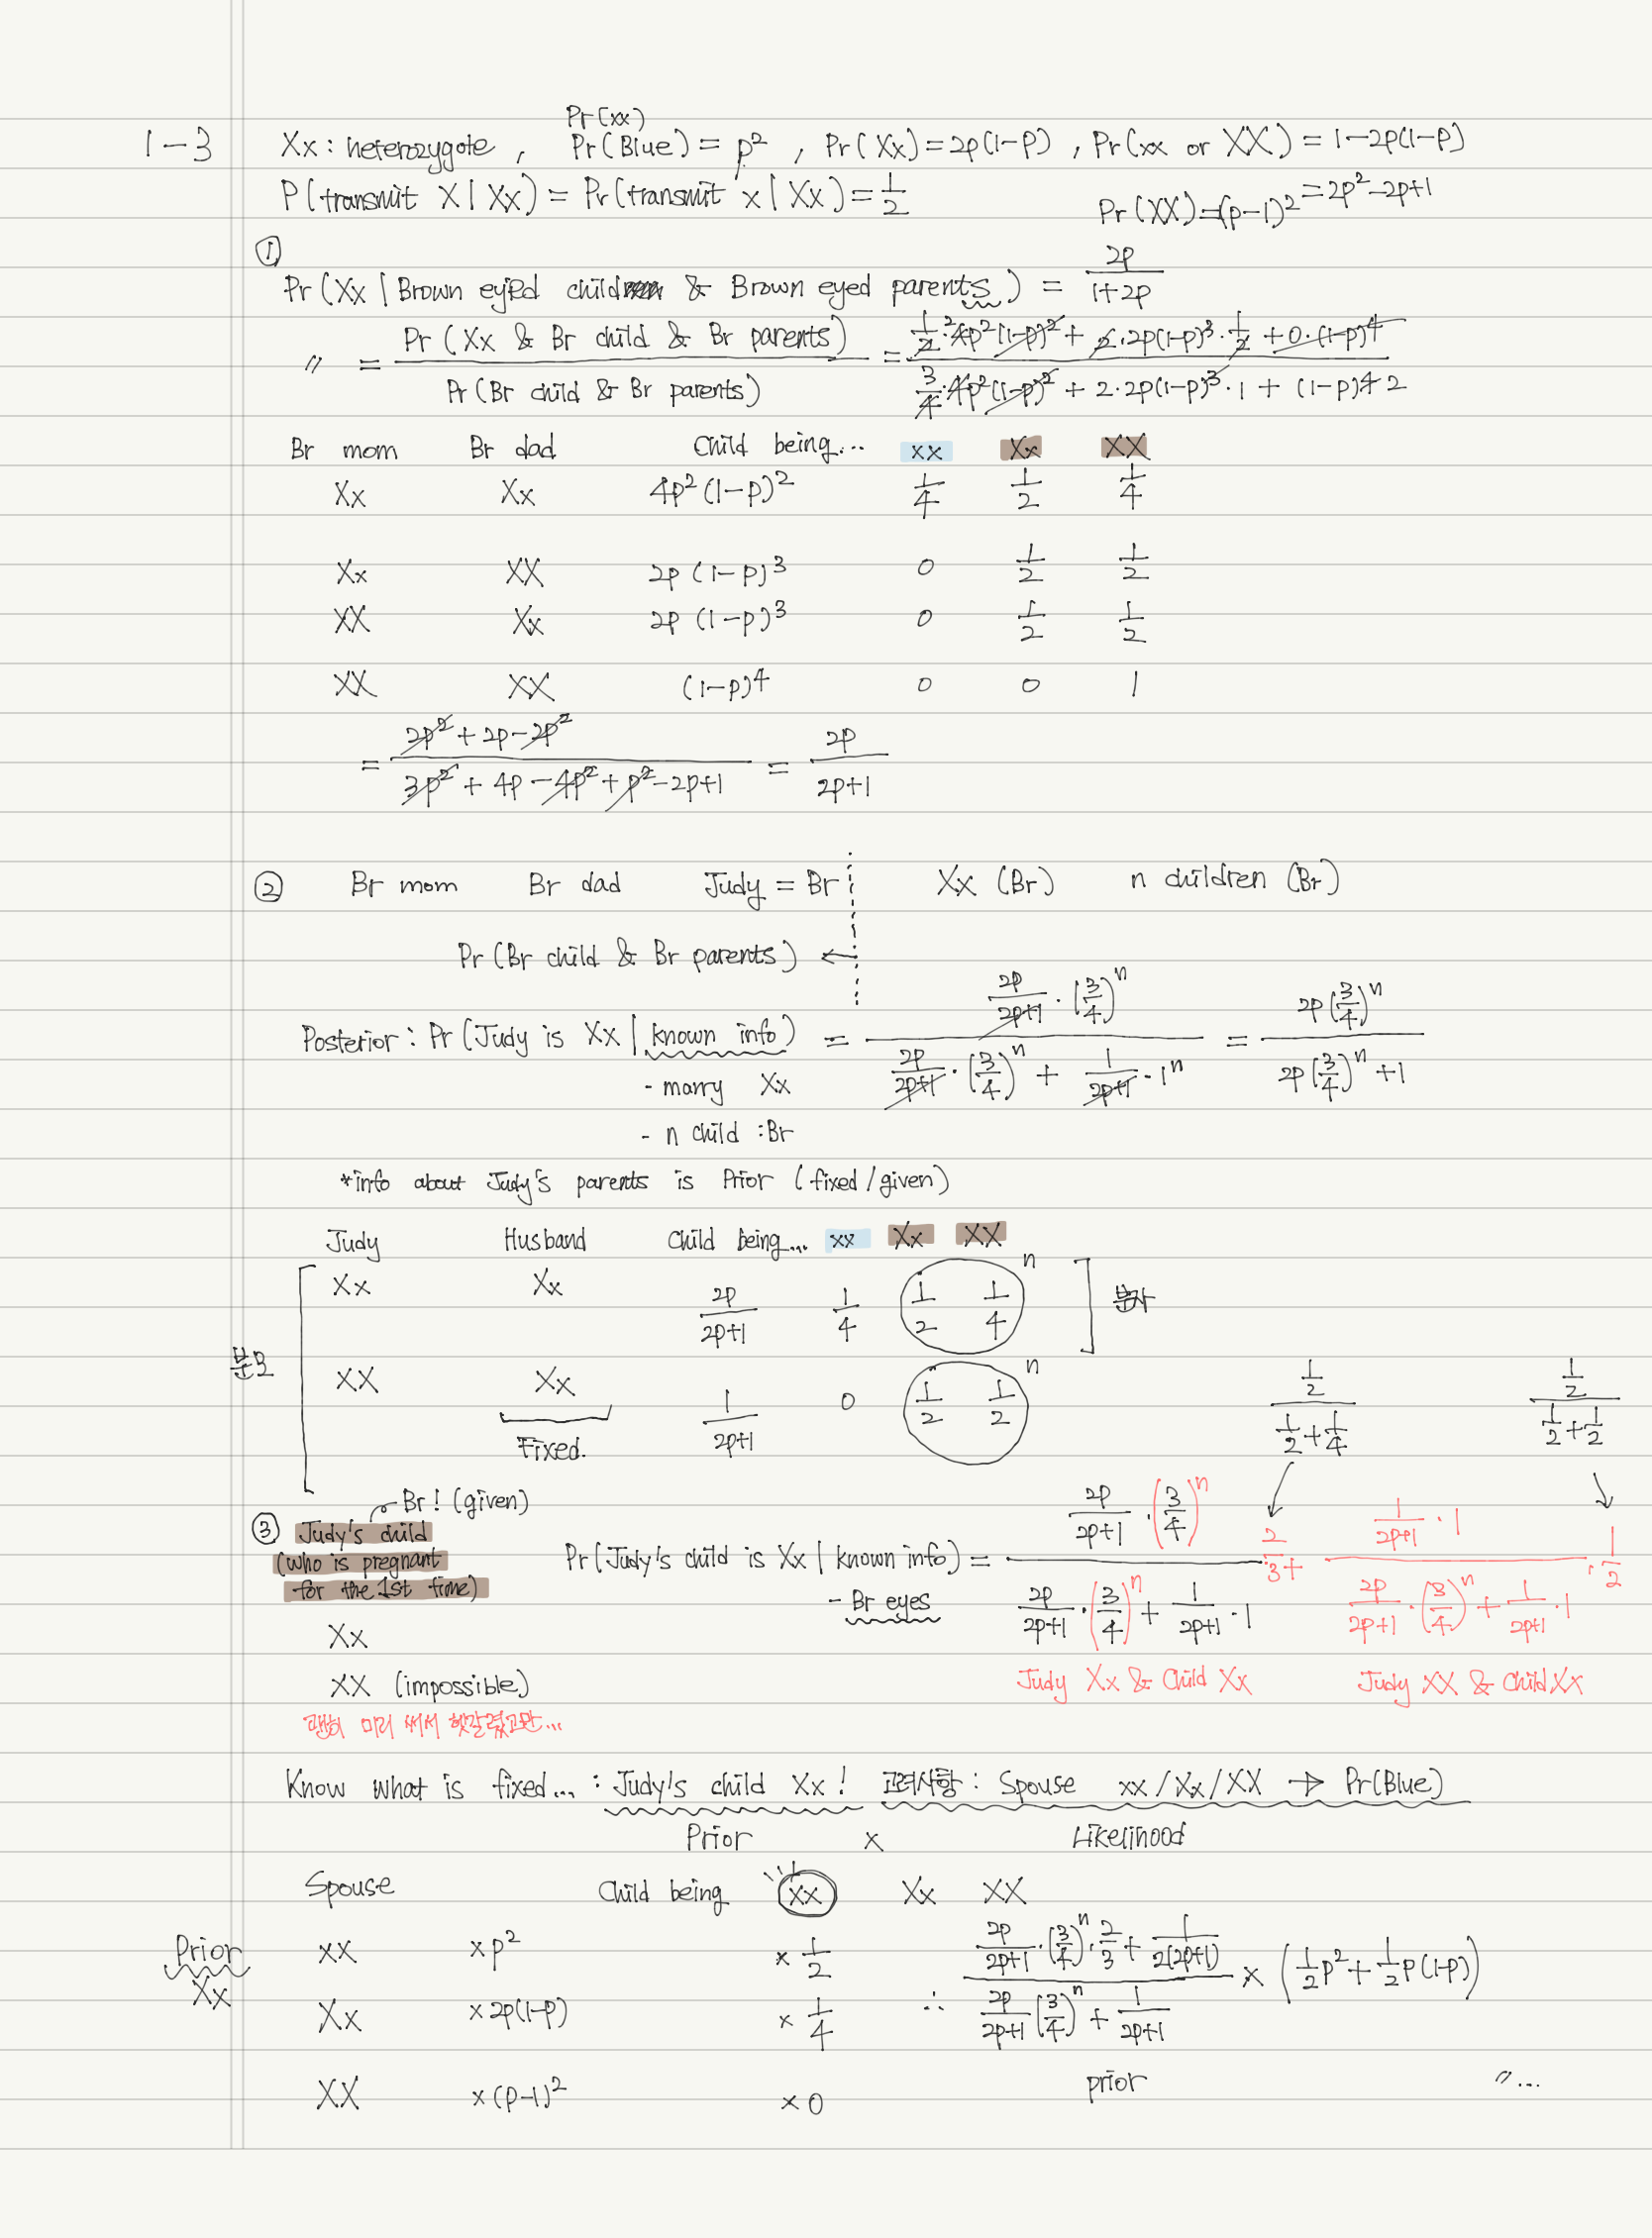

In [5]:
from IPython.display import Image
Image("/Users/soo._.yonee/Desktop/HW1P2.png")

**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석.  
다른 병원에서의 경험을 통해 생존율은 0.9 정도로 예상되며 0.8 미만이거나 0.97 초과일 것 같지는 않다고 생각한다.**

3-a) Beta distribution으로 위의 belief을 survival rate에 관한 prior distribution으로 나타내라. Parameter alpha, beta는 어떻게 선정하면 좋을 것인가? (Hint : 여러분의 믿음의 강도 따라 alpha, beta의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)  
  
$E[\theta] = \dfrac{\alpha}{\alpha+\beta} = 0.9$ 이므로 $\alpha : \beta = 9 : 1 = success : fail$  
  
생존률이 0.8 미만이거나 0.97 초과일 것 같지는 않다고 생각하므로 대부분의 density가 이 구간에 있다고 볼 수 있음.  
$P(\theta \in [0.8, 0.97]) \geq 0.95$

In [6]:
# probability density
k = 4.5
st.beta.cdf(0.97, 9*k, k) - st.beta.cdf(0.80, 9*k, k)

0.9522191509083359

In [7]:
prior = st.beta(9*k, k)

3-b) 이제 data gathering. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 Posterior Distribution 구하기.

In [8]:
# n = 10, num_sucess = 10
post = st.beta(9*k+10, k+10-10)

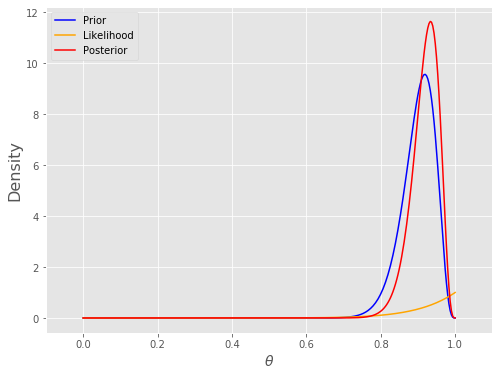

In [9]:
# Visualization
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**0)*likelihood(thetas, 10, 10), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)  
  
\- 다음 환자가 생존할 확률 (n=1, y=1)  
  
Actually mean of posterior distribution!
$p(x_{new}=1 | X) = \displaystyle \int_0^1{p(x_{new}|\theta, X)p(\theta|X)}d\theta 
                     = \displaystyle \int_0^1{p(x_{new}|\theta)p(\theta|X)}d\theta = \displaystyle \int_0^1{\theta p(\theta|X)}d\theta
                     = E[\theta|x] = \dfrac{a+y}{a+b+n}$

In [11]:
st.beta(9*k+10, k+10-10).mean()

0.9181818181818182

\- 다음 20명 중 2명 이상 사망할 확률  
  
$1 \ - \ [ p(x_{death}=0 | X) + p(x_{death}=1 | X) ] = 1 - \displaystyle \int_0^1{\theta^{20} p(\theta|X)}d\theta - \binom{20}{1} \displaystyle \int_0^1{\theta^{19}(1-\theta) p(\theta|X)}d\theta$

In [12]:
from scipy.special import gamma
death0 = (gamma(9*k+10 + k+10-10)*gamma(9*k+10+20))/(gamma(9*k+10)*gamma(9*k+10 + k+10-10 + 20))
death1 = (gamma(9*k+10 + k+10-10)*gamma(9*k+10+19)*gamma(k+10-10+1))/(gamma(9*k+10)*gamma(k+10-10)*gamma(9*k+10 + k+10-10 + 20))

1 - death0 - 20*death1

0.4665179787364557

계산과정... 좀 더럽지만...

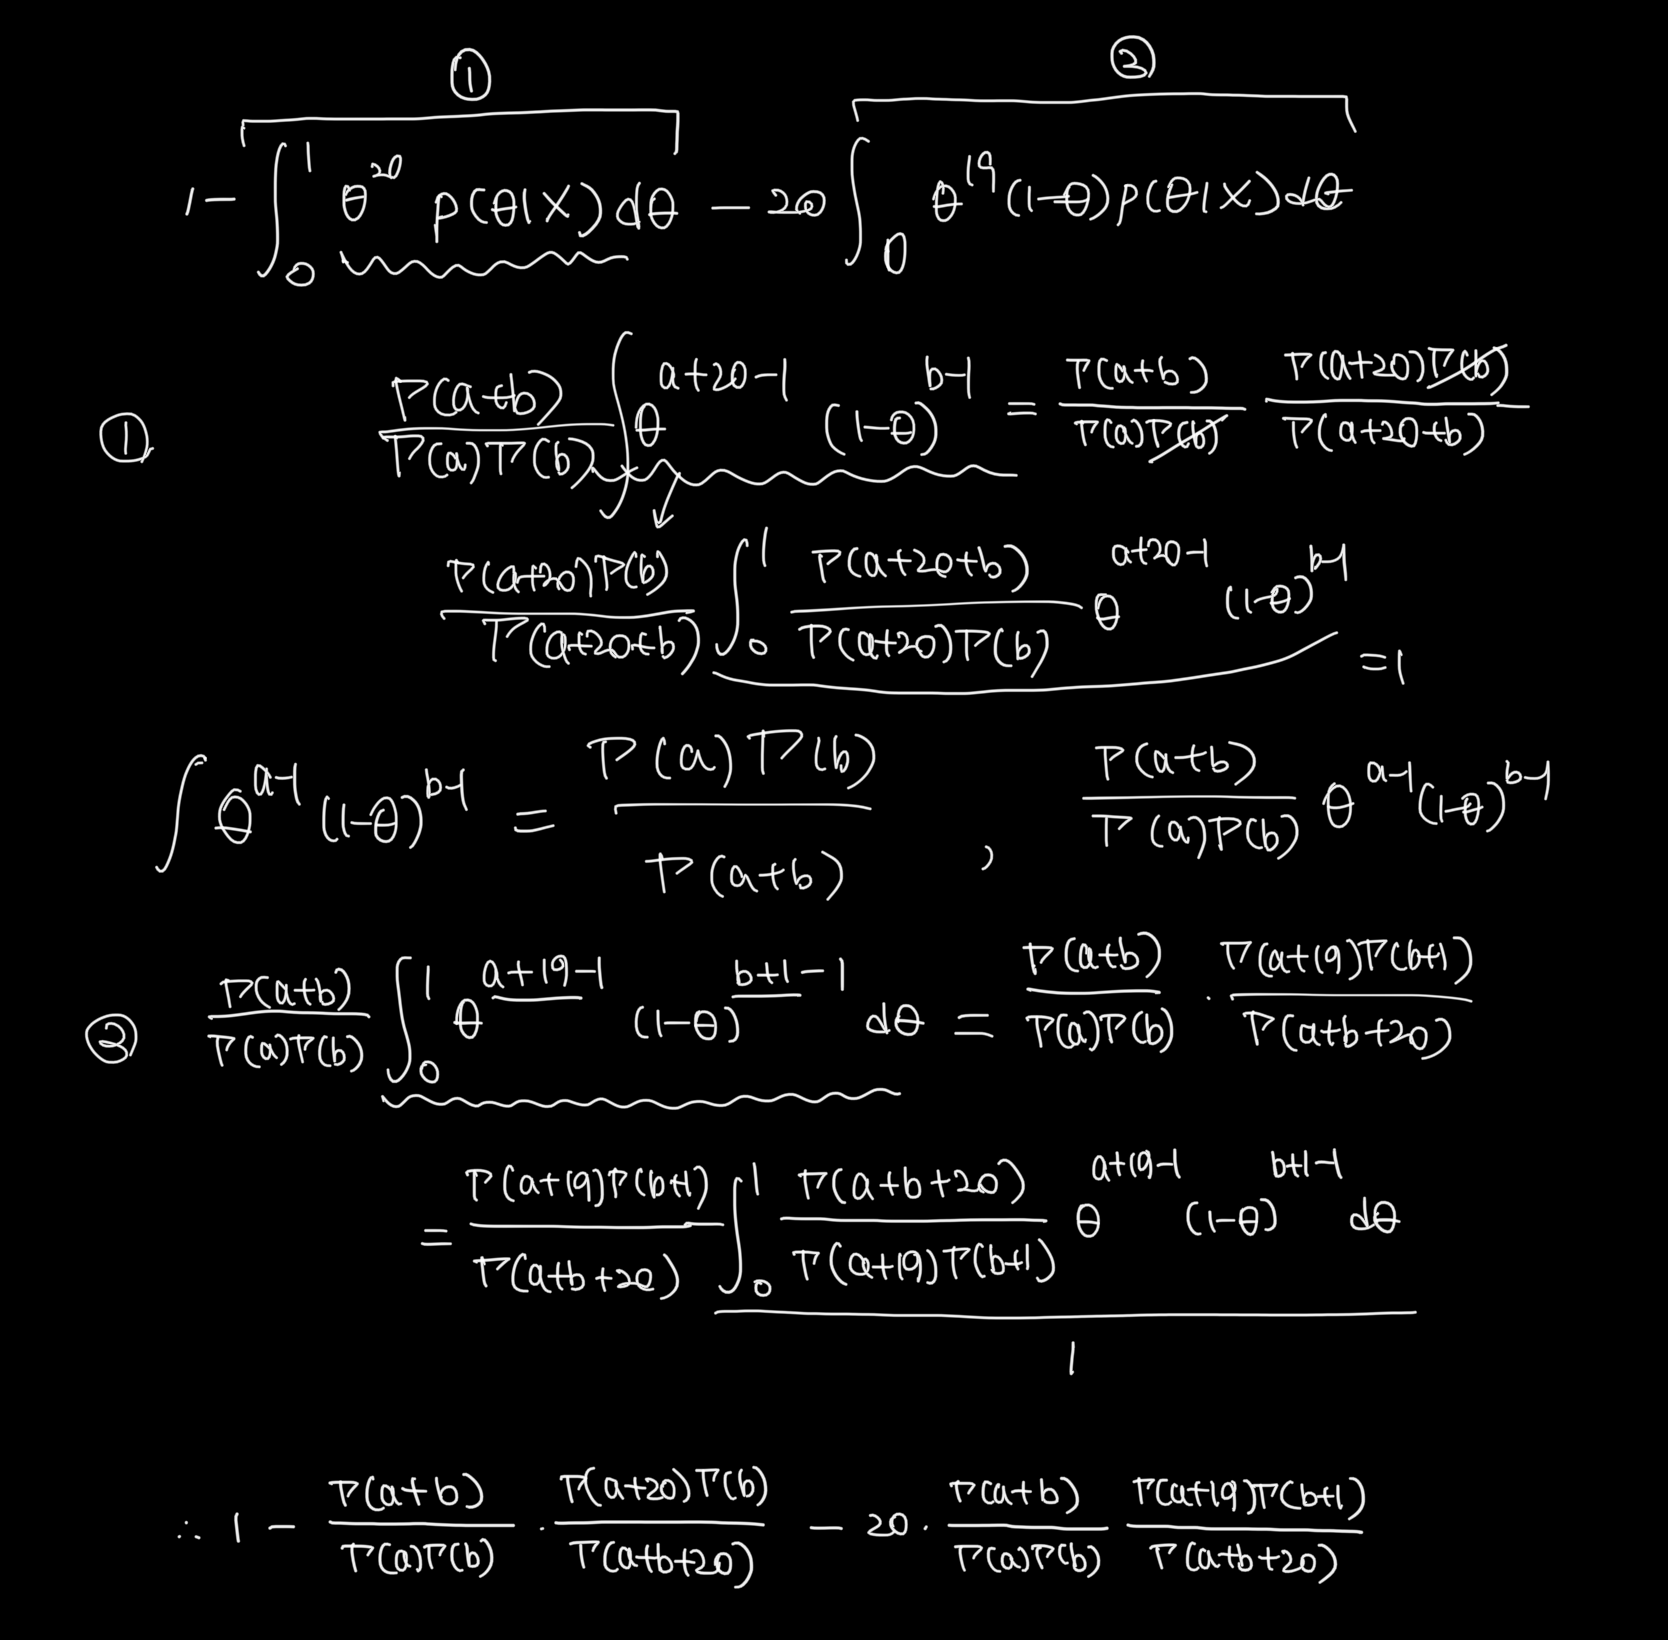

In [14]:
Image("/Users/soo._.yonee/Desktop/3C2.png")